In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.8/5.8 MB 15.2 MB/s eta 0:00:00


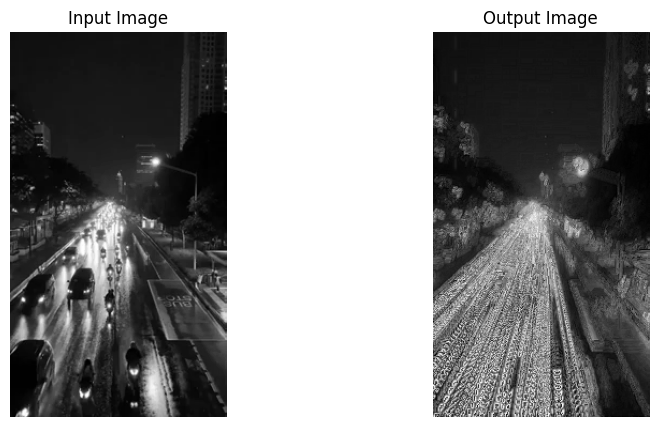

In [ ]:
!pip install mahotas
import cv2
import numpy as np
import mahotas as mh
import matplotlib.pyplot as plt

def create_image_stack(vid_file, n=200):
    vidcap = cv2.VideoCapture(vid_file)
    success, image = vidcap.read()

    if not success:
        print("Error: Tidak dapat membaca video.")
        return None, None

    h, w = image.shape[:2]
    imstack = np.zeros((n, h, w), dtype=np.uint8)  # Gunakan uint8 untuk memastikan tidak ada warna abu-abu

    for i in range(n):
        if not success:
            break
        imstack[i, ...] = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
        success, image = vidcap.read()

    return imstack, h, w

# Proses video
video_path ='/content/drive/MyDrive/images/jalanan.mp4'  # Pastikan path benar
image_stack, h, w = create_image_stack(video_path)

if image_stack is not None:
    stack = image_stack.shape[0]

    # Menampilkan frame pertama sebagai "Input Image"
    input_image = image_stack[0]

    # Menghitung tingkat fokus setiap frame menggunakan filter Sobel
    focus = np.array([mh.sobel(t, just_filter=True) for t in image_stack])

    # Menentukan frame terbaik berdasarkan fokus maksimal di setiap piksel
    best = np.argmax(focus, axis=0)

    # Ubah bentuk array untuk pemrosesan
    image_stack = image_stack.reshape((stack, -1))  # (stack, nr_pixels)
    image_stack = image_stack.transpose()  # (nr_pixels, stack)

    # Pilih piksel terbaik berdasarkan indeks maksimum fokus
    final = image_stack[np.arange(len(image_stack)), best.ravel()]

    # Ubah kembali ke bentuk gambar
    final_image = final.reshape((h, w)).astype(np.uint8)  # Konversi ke uint8

    # Simpan hasil
    cv2.imwrite('images/jalanan.png', final_image)

    # Menampilkan hasil menggunakan Matplotlib
    fig, axes = plt.subplots(1, 2, figsize=(10, 5))

    # Gambar input
    axes[0].imshow(input_image, cmap='gray', vmin=0, vmax=255)
    axes[0].set_title("Input Image")
    axes[0].axis('off')

    # Gambar hasil akhir
    axes[1].imshow(final_image, cmap='gray', vmin=0, vmax=255)
    axes[1].set_title("Output Image")
    axes[1].axis('off')

    plt.show()